## 🌈 PCA (Análisis de Componentes Principales) para Visualización

**PCA (Principal Component Analysis)** es una técnica de reducción de dimensionalidad utilizada para simplificar conjuntos de datos complejos manteniendo la mayor cantidad de información posible. Es especialmente útil para **visualizar datos en 2D o 3D** cuando originalmente tienen muchas dimensiones (features).

### 🎯 Objetivo

Transformar un conjunto de datos con muchas variables (dimensiones) en un nuevo conjunto de variables llamadas **componentes principales**, que son combinaciones lineales de las variables originales y que:

- Son **no correlacionadas entre sí**.
- Capturan la **mayor varianza posible** de los datos.

### 🧠 ¿Cómo funciona?

1. **Estandarización de los datos:**
   - Se asegura que todas las variables contribuyan por igual (media = 0, varianza = 1).

2. **Cálculo de la matriz de covarianza:**
   - Representa cómo varían las variables entre sí.

3. **Cálculo de autovalores y autovectores:**
   - Determinan la dirección y la "importancia" de cada componente.

4. **Selección de componentes principales:**
   - Se eligen los primeros componentes (usualmente 2 o 3) que expliquen el mayor porcentaje de varianza.

5. **Proyección de los datos:**
   - Los datos originales se transforman en este nuevo espacio reducido.

### 🧩 Ejemplo de Reducción

- Datos originales: 10 dimensiones
- Después de PCA: 2 dimensiones → visualización en 2D

### 📈 Visualización con PCA

PCA permite graficar datos **de alta dimensión en 2D o 3D**, revelando agrupaciones o estructuras que no serían visibles de otro modo.


### ✅ Ventajas
- Reduce la complejidad de los datos.
- Mejora la visualización de estructuras ocultas.
- Útil como paso previo a modelos de machine learning.

### ⚠️ Limitaciones
- Es una transformación lineal, no capta relaciones no lineales.
- La interpretación de los componentes puede ser compleja.
- Puede perder información si se eligen pocos componentes.

### 📊 Interpretación
- Componentes principales: combinaciones lineales de las variables originales.
- Varianza explicada: indica qué proporción de la información original conserva cada componente.
- Cargas (loadings): muestran el peso de cada variable original en cada componente.

### 📚 Aplicaciones
- Visualización de datos multivariantes.
- Preprocesamiento para clustering o clasificación.
- Reducción de ruido y compresión de datos.


In [1]:
# Manipulación de datos
import pandas as pd

df_jugadores = pd.read_csv("../data/jugadores.csv")
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
componentes = pca.fit_transform(X_scaled)

df_jugadores['PC1'] = componentes[:,0]
df_jugadores['PC2'] = componentes[:,1]

<Axes: xlabel='PC1', ylabel='PC2'>

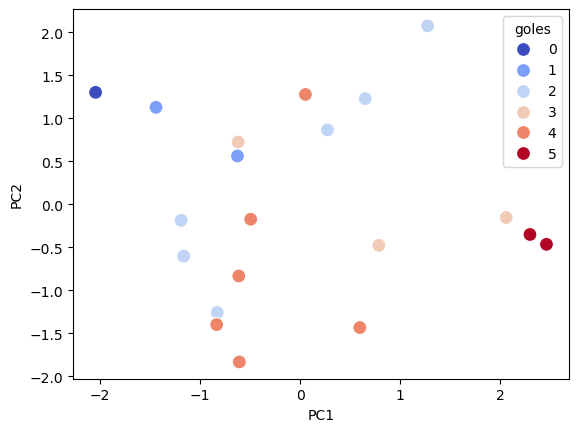

In [4]:
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=df_jugadores, hue='goles', palette='coolwarm', s=100)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X_scaled)

<Axes: xlabel='PC1', ylabel='PC2'>

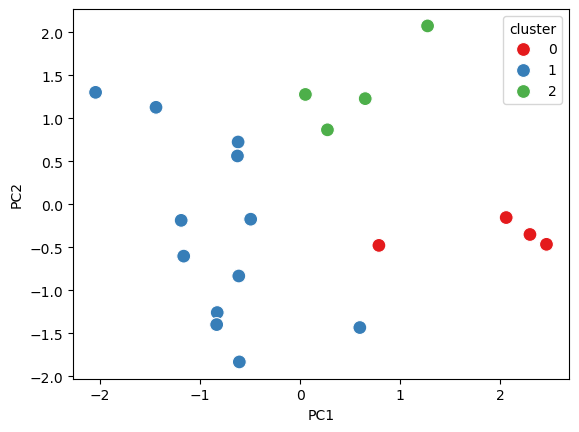

In [6]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set1', data=df_jugadores, s=100)

In [7]:
varianza = pca.explained_variance_ratio_

print(f"Varianza explicada por PC1: {varianza[0]:.2%}")
print(f"Varianza explicada por PC2: {varianza[1]:.2%}")
print(f"Varianza total explicada: {varianza.sum():.2%}")

Varianza explicada por PC1: 38.65%
Varianza explicada por PC2: 28.39%
Varianza total explicada: 67.04%


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Clusters en espacio {eje_x} vs {eje_y}')
    plt.grid(True)
    plt.show()

widgets.interactive(
    explorar_componentes,
    eje_x=['PC1', 'PC2'],
    eje_y=['PC1', 'PC2']
)

interactive(children=(Dropdown(description='eje_x', options=('PC1', 'PC2'), value='PC1'), Dropdown(description…